In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os.path
import glob

In [4]:
import math

In [5]:
from skimage.measure import compare_ssim as ssim

### pathes and objects

In [6]:
path = 'C:/Users/karin.sadovs/Desktop/HAND/objects'
included_extensions = ['jpg','jpeg', 'bmp', 'png', 'gif']

In [7]:
#objects = glob.glob(path'*.jpg')
objects = [fn for fn in os.listdir(path)
              if any(fn.endswith(ext) for ext in included_extensions)]

In [8]:
full_pathes = []
for objct in objects:
    full_pathes.append(path +'/'+ objct)

### functions

In [9]:
def convert(inp, mode):
    if (mode==1):
        constant = cv2.COLOR_BGR2HSV
    elif (mode==2):
        constant = cv2.COLOR_BGR2LAB
    elif (mode==3):
        constant = cv2.COLOR_BGR2YCrCb
    else:
        constant = 'lalalal'
    
    if (constant=='lalalal'):
        output = inp
    else:
        output = cv2.cvtColor(inp, constant)
    
    return output

In [10]:
def draw_img(img):
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [11]:
def get_cntr_eps(img, rad):
    center_x = int(img.shape[0]/2)
    center_y = int(img.shape[1]/2)
    
    center_small_area = []
    for i in range(0, rad):
        temp = img[center_x][center_y]
        center_small_area.append(temp)

        temp = img[center_x+i][center_y]
        center_small_area.append(temp)

        temp = img[center_x+i][center_y+i]
        center_small_area.append(temp)

        temp = img[center_x][center_y+i]
        center_small_area.append(temp)

        temp = img[center_x-i][center_y+i]
        center_small_area.append(temp)
        
        temp = img[center_x-i][center_y]
        center_small_area.append(temp)

        temp = img[center_x-i][center_y-i]
        center_small_area.append(temp)

        temp = img[center_x][center_y-i]
        center_small_area.append(temp)

        temp = img[center_x+i][center_y-i]
        center_small_area.append(temp)

    center_small_area_array = np.asarray(center_small_area)
    
    h_max = center_small_area_array[:, 0].max()
    h_min = center_small_area_array[:, 0].min()
    
    s_max = center_small_area_array[:, 1].max()
    s_min = center_small_area_array[:, 1].min()
    
    v_max = center_small_area_array[:, 2].max()
    v_min = center_small_area_array[:, 2].min()
    
        
    lower = np.array([h_min, s_min, v_min], dtype = "uint8")
    upper = np.array([h_max, s_max, v_max], dtype = "uint8")
    
    return lower, upper


In [12]:
def Sobel_grad(img, ksize):
    # uses the above two partial derivatives
    sobelx = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize)
    sobely = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize)
    
    abs_gradientx = cv2.convertScaleAbs(sobelx)
    abs_gradienty = cv2.convertScaleAbs(sobely)
    
    # combine the two in equal proportions
    total_gradient = cv2.addWeighted(abs_gradientx, 0.5, abs_gradienty, 0.5, 0)
    
    #np.unique(Sobel_edges)
    #array([  0, 128, 255], dtype=uint8)
    #so I add a small thresholding
    
    ret,thresh1 = cv2.threshold(total_gradient ,100,255,cv2.THRESH_BINARY)
    
    
#    return total_gradient
    return thresh1

In [13]:
def calc_difference(img1, img2):
    (score, diff) = ssim(img1, img2, full=True)
    diff = (diff * 255).astype("uint8")
    if (score!=1.0):
        draw_img(diff)
    else:
        print('Images are similar\n')
        
    return diff, score

Почему-то функция для отрисовки контуров не отрисовывает контуры

## Main Alg

In [ ]:
#this algo needs 3 fixes in drawings
#also it needs attention to background filtration that are commented
#also try to union the best countours and binaried area and fined their contours
#also try to find all types of contours (including Canny and Sobel) before binarization and unite them somehow after
#also play with the area while you're finding lower and upper levels of skin tone

#and, finally, look how countours will be like in different colorspaces
for obj in full_pathes:
    print(obj)
    frame = cv2.imread(obj,cv2.IMREAD_COLOR)
    
    print(frame.shape)
    converted = convert(frame,1) #see the function for more modes, now it's toHSV
    draw_img(converted)
    
    lower, upper = get_cntr_eps(converted, 7)
    
    skinMask = cv2.inRange(converted, lower, upper) 
    print('Binnarized: /n')
    draw_img(skinMask)
    print(' ')
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    #skinMask = cv2.erode(skinMask, kernel, iterations = 1) #пытаемся удалить ложно положительную кожу
    #skinMask = cv2.dilate(skinMask, kernel, iterations = 1)
    #skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0) #пытаемся избавиться от шумов
    
    #draw_img(skinMask)
    
    #cv2.imwrite(obj+'skin.jpg',skinMask)
   

    Canny_edges_orig = cv2.Canny(skinMask,100,200) #original
    print('Canny: /n')
    draw_img(Canny_edges_orig)
    print(' ')
    
    
    
    Sobel_edges = Sobel_grad(skinMask, 3)
    print('Sobel: /n')
    draw_img(Sobel_edges)
    print(' ')
    
   

    image, contours, hierarchy = cv2.findContours(skinMask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
    print('Contours: /n')
    draw_img(image)
#(1)########### придумать, как отрисовать нормально сразу оболочки всех контуры
    print('NOTHING HERE NOW FOR CONTOURS')
    print(' ')
    
    
    
    
    full_hull = []
    for i in (0, len(contours)-1):
        hull = cv2.convexHull(contours[i])
        full_hull.append(hull)
    print('Convex Hull: /n')
#(2)########### придумать, как отрисовать нормально сразу оболочки всех контуров и отрисовать их
    print('NOTHING HERE NOW FOR CONVEX HULL')
    print(' ')
    
    
    
    approximated_contours = []
    for i in (0, len(contours)-1):
        epsilon = 0.1*cv2.arcLength(contours[i],True)
        approx = cv2.approxPolyDP(contours[i],epsilon,True)
        approximated_contours.append(approx)
    print('Approximated Countours: /n')
    image = cv2.drawContours(image, approximated_contours, -1, (0,255,0), 10)
    draw_img(image)
#(3)########### придумать, как отрисовать нормально сразу контуры
    print('NOTHING HERE NOW FOR APPROXIMATED CONTOURS')
    print(' ')
    
    
    
    full_approx_hull = []
    for i in (0, len(approximated_contours)-1):
        hull = cv2.convexHull(approximated_contours[i])
        full_approx_hull.append(hull)
    print('Approimated Convex Hull: /n')
#(2)########### придумать, как отрисовать нормально сразу оболочки всех контуров и отрисовать их
    print('NOTHING HERE NOW FOR APPROXIMATED CONVEX HULL')
    print(' ')
    
    
    
    print(' ')
    print('----------------------------------------------------------------------------------------------------------')
    print('----------------------------------------------------------------------------------------------------------')
    print('----------------------------------------------------------------------------------------------------------')
    print(' ')

## Trying make mask by edges

In [39]:
def edges_f(img):
    
#line[i]==0 ----> line[i]==255    
   
    edges=[]
    for line in img:
        first=len(line)
        last=0
        for i in range(len(line)): #found real first black pixel in a line
            if line[i]==255:
                first = i
                break
        for i in range(len(line)): #found real last black pixel in a line
            if line[len(line)-i-1]==255:
                last = len(line)-i-1
                break

        edges.append([first,last])
    
    for i in range(len(edges)):
        if edges[i][0]<edges[i][1]: #i is number of a line, 0 and 1 equals first and last, and in this line of code we check if f<l
            for j in range(edges[i][0],edges[i][1]): #and now btw first and last in line paint it black!
                img[i][j]=255

    print('fisrt')
    draw_img(img)
    
    #############################################################################
    
    max_seqs=[]
    for line in img.T: #transponered image
        seq=[]
        first=0 #FIRST is from what we begin our calculations of sequences of solid blocks of pixels in line, but line here is a column

        while first < len(line):
            if line[first]==0: #if pixel of it is black
                j=first
                while j<len(line) and line[j]==0: #if j still in line and this pixel is black we increase j
                    j+=1
                seq.append([first,j])
                first=j+1
            else:
                first+=1   #so far, we found all solid sequences in line (in real column)
        if len(seq)>0:        #we are in search of max sequence of black pixels in line  in an array of all sequences in line
            max_seq=seq[np.argmax(np.array([k[1]-k[0] for k in seq]))]
        else:
            max_seq=[0,0]
        max_seqs.append(max_seq)    

    ###################################################################################33
    
    img_2=np.zeros((img.shape[1],img.shape[0])) #create an img2 as a transponered copybox to fill it as max_seqs
    for i in range(len(max_seqs)):
        if max_seqs[i][1]-max_seqs[i][0]>20: 
            for j in range(max_seqs[i][0],max_seqs[i][1]): #i is a num of line (col of org img)
                img_2[i][j]=255 #all pixels in range of maximal solid sequences in current line (col of org img) we paint white
    img_2=img_2.T #transponere the img2 again (to see it as original img's orientation)

    
    print('second')
    draw_img(img_2)
    
    
    #####################################################################################
    
    #here we do the same, but in original orientation, and with inverse colours
    #so, if at first time we walked vertical, now we walk horizontal
    max_seqs=[]
    for line in img_2:
        seq=[]
        first=0

        while first < len(line):
            if line[first]==255:
                j=first
                while j<len(line) and line[j]==255:
                    j+=1
                seq.append([first,j])
                first=j+1
            else:
                first+=1

        if len(seq)>0:
            max_seq=seq[np.argmax(np.array([k[1]-k[0] for k in seq]))]
        else:
            max_seq=[0,0]
        max_seqs.append(max_seq)    
        
       #####################################################################################


    img_3=np.zeros(img_2.shape)
    for i in range(len(max_seqs)):
        if max_seqs[i][1]-max_seqs[i][0]>20:
            for j in range(max_seqs[i][0],max_seqs[i][1]):
                img_3[i][j]=255

    print('third')
    draw_img(img_3)
    
    

In [53]:
def edg(img):
    
    first_img = img.copy()
    second_img = img.copy()
    
    
    edgesT=[]
    for line in img.T:
        first=len(line)
        last=0
        for i in range(len(line)): #found real first black pixel in a line
            if line[i]==255:
                first = i
                break
        for i in range(len(line)): #found real last black pixel in a line
            if line[len(line)-i-1]==255:
                last = len(line)-i-1
                break

        edgesT.append([first,last])
    
    for i in range(len(edgesT)):
        if edgesT[i][0]<edgesT[i][1]: #i is number of a line, 0 and 1 equals first and last, and in this line of code we check if f<l
            for j in range(edgesT[i][0],edgesT[i][1]): #and now btw first and last in line paint it black!
                first_img.T[i][j]=255

    print('fisrt')
    draw_img(first_img)

    
    edges=[]
    for line in img:
        first=len(line)
        last=0
        for i in range(len(line)): #found real first black pixel in a line
            if line[i]==255:
                first = i
                break
        for i in range(len(line)): #found real last black pixel in a line
            if line[len(line)-i-1]==255:
                last = len(line)-i-1
                break

        edges.append([first,last])
    
    for i in range(len(edges)):
        if edges[i][0]<edges[i][1]: #i is number of a line, 0 and 1 equals first and last, and in this line of code we check if f<l
            for j in range(edges[i][0],edges[i][1]): #and now btw first and last in line paint it black!
                second_img[i][j]=255

    print('second')
    draw_img(second_img)
    
    
    img_bwa = cv2.bitwise_and(first_img,second_img)
    print('bwa')
    draw_img(img_bwa)
    
    img_bwo = cv2.bitwise_or(first_img,second_img)
    print('bwo')
    draw_img(img_bwo)
    

In [ ]:
for obj in full_pathes:
    print(obj)
    frame = cv2.imread(obj,cv2.IMREAD_COLOR)
    
    print(frame.shape)
    converted = convert(frame,1) #see the function for more modes, now it's toHSV
    draw_img(converted)
    
    lower, upper = get_cntr_eps(converted, 7)
    
    skinMask = cv2.inRange(converted, lower, upper) 
    print('Binnarized: /n')
    draw_img(skinMask)
    print(' ')
    print('Edges: /n')
    edg(skinMask)
    

### Trying morphological huinew

In [ ]:
for obj in full_pathes:
    print(obj)
    frame = cv2.imread(obj,cv2.IMREAD_COLOR)
    
    img_for_gb = frame.copy()
    gb_img = cv2.GaussianBlur(img_for_gb, (5, 5), 0)
    #print('gb_img')
    #draw_img(gb_img)
    
    img_for_bb = frame.copy()
    bb_img = cv2.bilateralFilter(img_for_bb, 9,75,75)
    #print('bb_img')
    #draw_img(bb_img)
    
    kernel = np.ones((5, 5))
    
    img_for_erode = frame.copy()
    eroded_img = cv2.erode(img_for_erode, kernel, iterations = 1)
    print('eroded_img')
    draw_img(eroded_img)
    
    img_for_dilate = frame.copy()
    dilated_img =cv2.dilate(img_for_dilate,kernel, 1)
    print('dilated_img')
    draw_img(dilated_img)
    
    img_for_open = frame.copy()
    opened_img = cv2.morphologyEx(img_for_open, cv2.MORPH_OPEN, kernel)
    print('opened_img')
    draw_img(opened_img)
    
    img_for_close = frame.copy()
    closed_img = cv2.morphologyEx(img_for_close, cv2.MORPH_CLOSE, kernel)
    print('closed_img')
    draw_img(closed_img)
    
    img_for_grad = frame.copy()
    gradiented_img = cv2.morphologyEx(img_for_grad, cv2.MORPH_GRADIENT, kernel)
    print('gradiented_img')
    draw_img(gradiented_img)
    
    img_for_topHat = frame.copy()
    topHated_img = cv2.morphologyEx(img_for_topHat, cv2.MORPH_TOPHAT, kernel)
    print('topHated_img')
    draw_img(topHated_img)
        
    img_for_blackHat = frame.copy()
    blackHated_img = cv2.morphologyEx(img_for_blackHat, cv2.MORPH_BLACKHAT, kernel)
    print('blackHated_img')
    draw_img(blackHated_img)
    
    converted_orig = convert(frame,1) #see the function for more modes, now it's toHSV
    converted_gb = convert(gb_img, 1)
    converted_bb = convert(bb_img, 1)
    converted_eroded = convert(eroded_img, 1)
    converted_dilated = convert(dilated_img, 1)
    converted_opened = convert(opened_img, 1)
    converted_closed = convert(closed_img, 1)
    converted_grad = convert(gradiented_img, 1)
    converted_top =convert(topHated_img, 1)
    converted_black = convert(blackHated, 1)
    #print('converted_orig')
    #draw_img(converted_orig)
    #print('converted_gb')
    #draw_img(converted_gb)
    
    lower_orig, upper_orig = get_cntr_eps(converted_orig, 7)
    lower_gb, upper_gb = get_cntr_eps(converted_gb, 7)
    lower_bb, upper_bb = get_cntr_eps(converted_bb, 7)
    lower_er, upper_er = get_cntr_eps(converted_eroded, 7)
    lower_dil, upper_dil = get_cntr_eps(converted_dilated, 7)
    lower_opened, upper_opened = get_cntr_eps(converted_opened, 7)
    lower_closed, upper_closed = get_cntr_eps(converted_closed, 7)
    lower_grad, upper_grad = get_cntr_eps(converted_grad, 7)
    lower_top, upper_top = get_cntr_eps(converted_top, 7)
    lower_black, upper_black = get_cntr_eps(converted_black, 7)
    
    skinMask_orig = cv2.inRange(converted_orig, lower_orig, upper_orig)
    skinMask_gb = cv2.inRange(converted_gb, lower_gb, upper_gb)
    skinMask_bb = cv2.inRange(converted_bb, lower_bb, upper_bb)
    skinMask_eroded = cv2.inRange(converted_eroded, lower_er,upper_er)
    skinMask_dilated= cv2.inRange(converted_dilated, lower_dil, upper_dil)
    skinMask_opened = cv2.inRange(converted_opened, lower_opened, upper_opened)
    skinMask_closed = cv2.inRange(converted_closed, lower_closed, upper_closed)
    skinMask_grad = cv2.inRange(converted_grad, lower_grad, upper_grad)
    skinMask_top = cv2.inRange(converted_top, lower_top, upper_top)
    skinMask_black = cv2.inRange(converted_black, lower_black, upper_black)
    
    
    print('Binnarized: /n')
    print(' /n')
    print('SkinMask orig')
    draw_img(skinMask_orig)
    print('SkinMask gb')
    draw_img(skinMask_gb)
    print('skinMask_bb')
    draw_img(skinMask_bb)
    print('skinMask_eroded')
    draw_img(skinMask_eroded)
    print('skinMask_dilated')
    draw_img(skinMask_dilated)
    print('skinMask_opened')
    draw_img(skinMask_opened)
    print('skinMask_closed')
    draw_img(skinMask_closed)
    print('skinMask_grad')
    draw_img(skinMask_grad)
    
    
    
    
    
    

#### Всякая контурная хуйня

In [223]:
# [cv2.moments(contours[i]) for i in range(0, len(contours))]

In [224]:
area = cv2.contourArea(cnt)
area

21.5

In [225]:
perimeter = cv2.arcLength(cnt,True)
perimeter

24.3847758769989

Bounding rectangles, circle, ellipse and line

In [242]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [244]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
image = cv2.drawContours(image,[box],0,(0,0,255),2)

In [245]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

In [247]:
ellipse = cv2.fitEllipse(cnt)
image = cv2.ellipse(image
                    ,ellipse,(0,255,0),2)

In [248]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

#### Попробовать

Gaussian blur

Combine x and y Sobel Filters (w/ scaling)

Gaussian blur

Canny edge detection

Finding Hough lines

Extrapolating the intersection of the Hough lines to get corners

In [ ]:
for obj in full_pathes:
    print(obj)
    frame = cv2.imread(obj,cv2.IMREAD_COLOR)
    
    print(frame.shape)
    converted = convert(frame,1)  #see the function for more modes, now it's toHSV
    draw_img(converted)
    
    lower, upper = get_cntr_eps(converted, 7)
    
    skinMask = cv2.inRange(converted, lower, upper) 
    print('Binnarized: /n')
    draw_img(skinMask)
    
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
    
    Sobel_edges = Sobel_grad(skinMask, 3)
    
    skinMask = cv2.GaussianBlur(Sobel_edges, (3, 3), 0)
    
    Canny_edges_orig = cv2.Canny(skinMask,100,200)
    
    draw_img(Canny_edges_orig)
    

### Failures

мб гауссианский блюр поможет продлить полученные границы, чтоб кенни потом засек чуть больше краев? нет

In [ ]:
for obj in full_pathes:
    print(obj)
    frame = cv2.imread(obj,cv2.IMREAD_COLOR)
    
    print(frame.shape)
    converted = convert(frame,1)
    draw_img(converted)
    
    lower, upper = get_cntr_eps(converted, 7)

    
    skinMask = cv2.inRange(converted, lower, upper) 
    draw_img(skinMask)
    
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    #skinMask = cv2.erode(skinMask, kernel, iterations = 1) #пытаемся удалить ложно положительную кожу
    #skinMask = cv2.dilate(skinMask, kernel, iterations = 1)
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0) #пытаемся избавиться от шумов
    
    draw_img(skinMask)
    
    #cv2.imwrite(obj+'skin.jpg',skinMask)
    
    edges = cv2.Canny(skinMask,100,200)
    draw_img(edges)

мб чуть-чуть медианизируем картинку, прежде чем бинаризовать ее? уменьшим количество цветов, подтянем странные оттенки по кластерам? мб тогда что-то странное подтянется к тому, что нормально бинаризуется и не исследнет бесчезно?
(нет) хотя! мб попробовать совсем уж ручками кастомный алгоритм написать? но это если совсем ничего не останется
проба показывает, что вообще ничего 

In [ ]:
for obj in full_pathes:
    print(obj)
    frame = cv2.imread(obj,cv2.IMREAD_COLOR)
    
    print(frame.shape)
    converted = convert(frame,1)
    draw_img(converted)
    
    lower, upper = get_cntr_eps(converted, 7)

    median = cv2.medianBlur(converted,5)
    draw_img(median)
    
    skinMask = cv2.inRange(median, lower, upper) 
    draw_img(skinMask)
    
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    #skinMask = cv2.erode(skinMask, kernel, iterations = 1) #пытаемся удалить ложно положительную кожу
    #skinMask = cv2.dilate(skinMask, kernel, iterations = 1)
    #skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0) #пытаемся избавиться от шумов
    
    #draw_img(skinMask)
    
    #cv2.imwrite(obj+'skin.jpg',skinMask)
    
    edges = cv2.Canny(skinMask,100,200)
    draw_img(edges)

Че в Кенни не подкручивай - ничего не изменится.
Проверка перебором вот, можно параметры новые повставлять, поперебирать - но ничего не изменится

    Canny_edges_orig = cv2.Canny(skinMask,100,200) #original
    draw_img(Canny_edges_orig)
    Canny_edges_try = cv2.Canny(skinMask, 0, 0)
    draw_img(Canny_edges_try)
    
    calc_difference(Canny_edges_orig, Canny_edges_try)
   



Canny parameters

threshold1	first threshold for the hysteresis procedure.

threshold2	second threshold for the hysteresis procedure.

apertureSize	aperture size for the Sobel operator. ------- не влияет на результат при 100, 200

L2gradient	a flag, indicating whether a more accurate L2 norm =(dI/dx)2+(dI/dy)2−−−−−−−−−−−−−−−−√ should be used to calculate the image gradient magnitude ( L2gradient=true ), or whether the default L1 norm =|dI/dx|+|dI/dy| is enough ( L2gradient=false ).

    Canny_edges_orig = cv2.Canny(skinMask,100,200) #original
    draw_img(Canny_edges_orig)
    
    Canny_edges_try = cv2.Canny(skinMask,100,200, L2gradient=True) 
    draw_img(Canny_edges_try)
    
    calc_difference(Canny_edges_orig, Canny_edges_try)
    
Есть какая-то разница, но я ее качественно не вижу глазами

Из-за гэпов в Кенни предлагают либо увеличивать ядро (не помогает), либо использовать findContours (хммммм)))) )

Вообще по теме есть какие-то линии Хофа еще, но тут какая-то херня

Они, по ходу, горизонтальные и вертикальные, у нас такие не ищутся

Ну и пока res NoneType не работает отрисовка, и почему-то условие на NoneType плохо проверяется - с != все равно заходит в if, с == не заходит, в не зависимости от того, что выводит принт тайпа рез

In [167]:
#менять только последние три
res = cv2.HoughLinesP(edges, rho = 1, theta = math.pi / 180, threshold = 70, minLineLength = 100, maxLineGap = 10)
#res = edges
print(type(res))
if (type(res) == 'NoneType'):
    draw_img(res)
    print('Hough Lines /n')
else:
    print('No Hough Lines at all')
    
'''for x in range(0, len(res)):
    for x1,y1,x2,y2 in res[x]:
        cv2.res(img,(x1,y1),(x2,y2),(0,255,0),2)'''

<class 'NoneType'>
No Hough Lines at all


'for x in range(0, len(res)):\n    for x1,y1,x2,y2 in res[x]:\n        cv2.res(img,(x1,y1),(x2,y2),(0,255,0),2)'

## Побочные Задачи

   Надо убрать голову (фейс детектор - вырезаем это место ин ренджем или кем)
   Надо почистить от шумов фон (точно не вот той вот херней)
   и когда оно стену детектит сильно

In [7]:
cv2.__file__

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\cv2.cp37-win_amd64.pyd'

haarcascade_frontalface_alt.xml

haarcascade_frontalface_default.xml

In [105]:
face_cascade = cv2.CascadeClassifier('C:/ProgramData/Anaconda3/Lib/site-packages/haarcascade_frontalface_default.xml')

In [119]:
img = cv2.imread('C:/Users/karin.sadovs/Desktop/face_PNG5669.jpg')
#img = cv2.imread('C:/Users/karin.sadovs/Desktop/HAND/objects/2018_12_25_21_29_22.jpg')

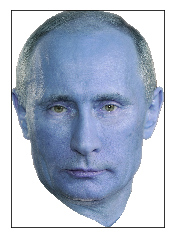

In [107]:
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [108]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [109]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [110]:
faces

array([[ 116,  515, 1349, 1349]], dtype=int32)

In [111]:
 eye_cascade = cv2.CascadeClassifier('C:/ProgramData/Anaconda3/Lib/site-packages/haarcascade_eye.xml')

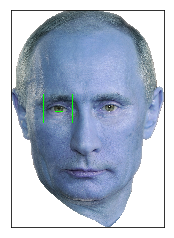

In [112]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    plt.imshow(img, cmap = 'gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [116]:
img[116:1349,515:1349,:]=255

In [120]:
img[515:1349,116:1349,:]=255

In [122]:
faces

array([[ 116,  515, 1349, 1349]], dtype=int32)

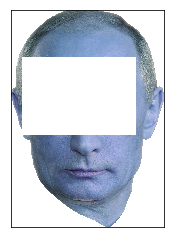

In [123]:
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()